### Graphics compression ###

The SVD factorization is used also to obtain the best approximation w.r.t the Frobenius norm/$2$-norm of the matrix $A$ with a matrix of rank $r$. As a consequence, we want to use this result to  obtain a lossy compressed graphic image from a .jpeg graphic file

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from google.colab import drive
import os
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
path='/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/hasbulla.jpeg'

Image=plt.imread(path) #here we have 3 images because it is a color image. We work on the greày one
A=Image[:,:,0]


Let us visualize the image without compression

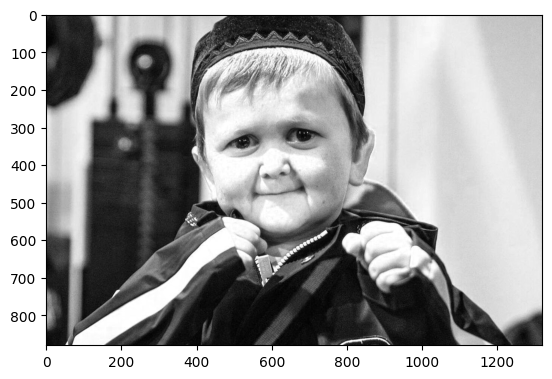

In [ ]:
plt.imshow(A, cmap='gray')

We now use the SVD to produce approximation of the previous image

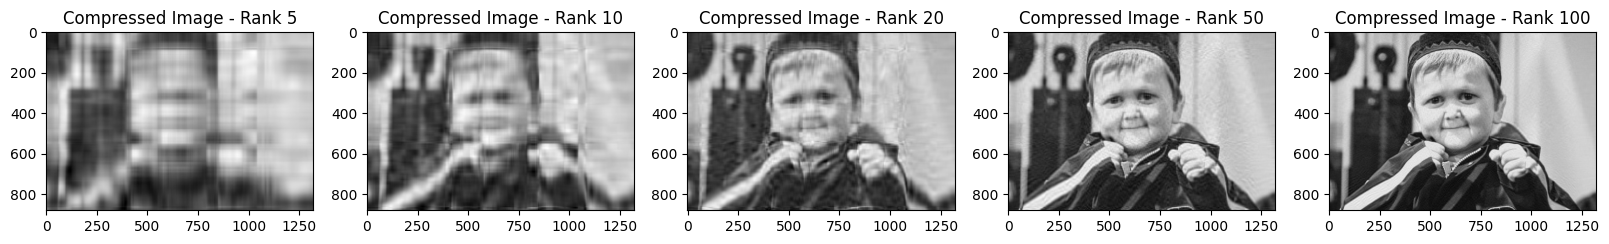

In [ ]:
def compress_and_save_image(original_image, rank, output_folder="/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/compressed images"):
  U, S, V = scipy.linalg.svd(original_image)
  S_k = S[:rank]
  compressed_image =U[:,:rank].dot(np.diag(S_k).dot(V[:rank,:]))
  #we compute the frobenius norm
  frobenius_norm_percentage = np.sum(S_k**2) / np.sum(S**2) # The relative error is ||A-A_k||_F/||A||_F so it is (s_{k+1}^2+...s_{n}^2)/( (s_{1}^2+...s_{n}^2))
  #the name reflects the percentage as required
  output_filename = f"{output_folder}/compressed_{rank}_rank_{int(frobenius_norm_percentage * 100)}%.jpeg"
  #we save the image
  plt.imsave(output_filename, compressed_image, cmap='gray')
  return output_filename,frobenius_norm_percentage

# Here we create a folder to collect the images
output_folder = "/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/compressed images"
os.makedirs(output_folder, exist_ok=True)

#We try different ranks
test_ranks = [5,10,20,50,100]

fig = plt.figure(figsize=(20, 20))
for i, rank in enumerate(test_ranks):
    compressed_filename, frobenius_norm_percentage = compress_and_save_image(A, rank, output_folder)
    path = os.path.join(output_folder, f"compressed_{rank}_rank_{int(frobenius_norm_percentage * 100)}%.jpeg")
    Image_approx = plt.imread(path)
    plt.subplot(1,5, i + 1)
    plt.imshow(Image_approx, cmap='gray')
    plt.title(f"Compressed Image - Rank {rank}")

plt.show()




Let us try with another example of image containing text

In [ ]:
path='/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/Logo.jpg'

Image=plt.imread(path) #here we have 3 images because it is a color image. We work on the greày one
A=Image[:,:,0]

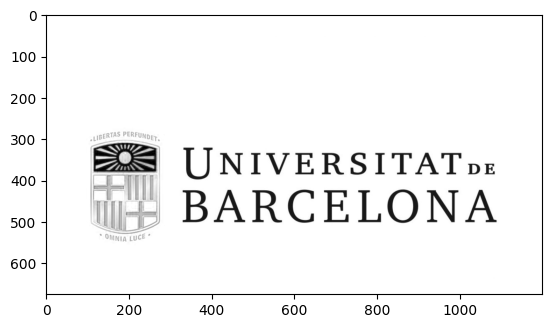

In [ ]:
plt.imshow(A, cmap='gray')

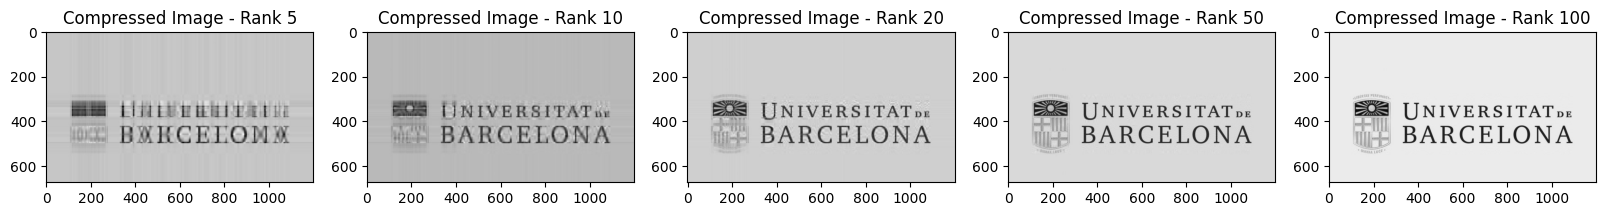

In [ ]:
def compress_and_save_image(original_image, rank, output_folder="/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/compressed images"):
  U, S, V = scipy.linalg.svd(original_image)
  S_k = S[:rank]
  compressed_image =U[:,:rank].dot(np.diag(S_k).dot(V[:rank,:]))
  #we compute the frobenius norm
  frobenius_norm_percentage = np.sum(S_k**2) / np.sum(S**2) # The relative error is ||A-A_k||_F/||A||_F so it is (s_{k+1}^2+...s_{n}^2)/( (s_{1}^2+...s_{n}^2))
  #the name reflects the percentage as required
  output_filename = f"{output_folder}/compressed2_{rank}_rank_{int(frobenius_norm_percentage * 100)}%.jpeg"
  #we save the image
  plt.imsave(output_filename, compressed_image, cmap='gray')
  return output_filename,frobenius_norm_percentage

fig = plt.figure(figsize=(20, 20))
for i, rank in enumerate(test_ranks):
    compressed_filename, frobenius_norm_percentage = compress_and_save_image(A, rank, output_folder)
    path = os.path.join(output_folder, f"compressed2_{rank}_rank_{int(frobenius_norm_percentage * 100)}%.jpeg")
    Image_approx = plt.imread(path)
    plt.subplot(1,5, i + 1)
    plt.imshow(Image_approx, cmap='gray')
    plt.title(f"Compressed Image - Rank {rank}")

plt.show()

Now we try the same ranks with a more complicated image with a lot of details

In [ ]:
path='/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/pollock.jpg'

Image=plt.imread(path) #here we have 3 images because it is a color image. We work on the greày one
R = Image[:,:,0]
G = Image[:,:,1]
B = Image[:,:,2]

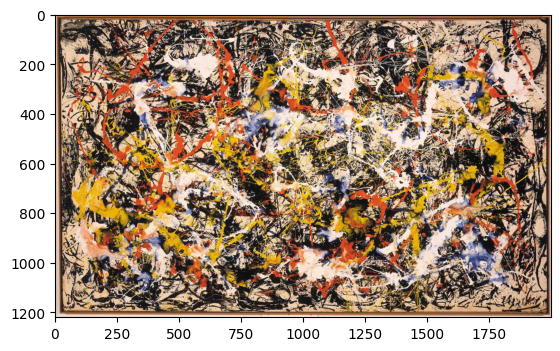

In [ ]:
colored_image = np.dstack([R, G, B])
plt.imshow(colored_image)

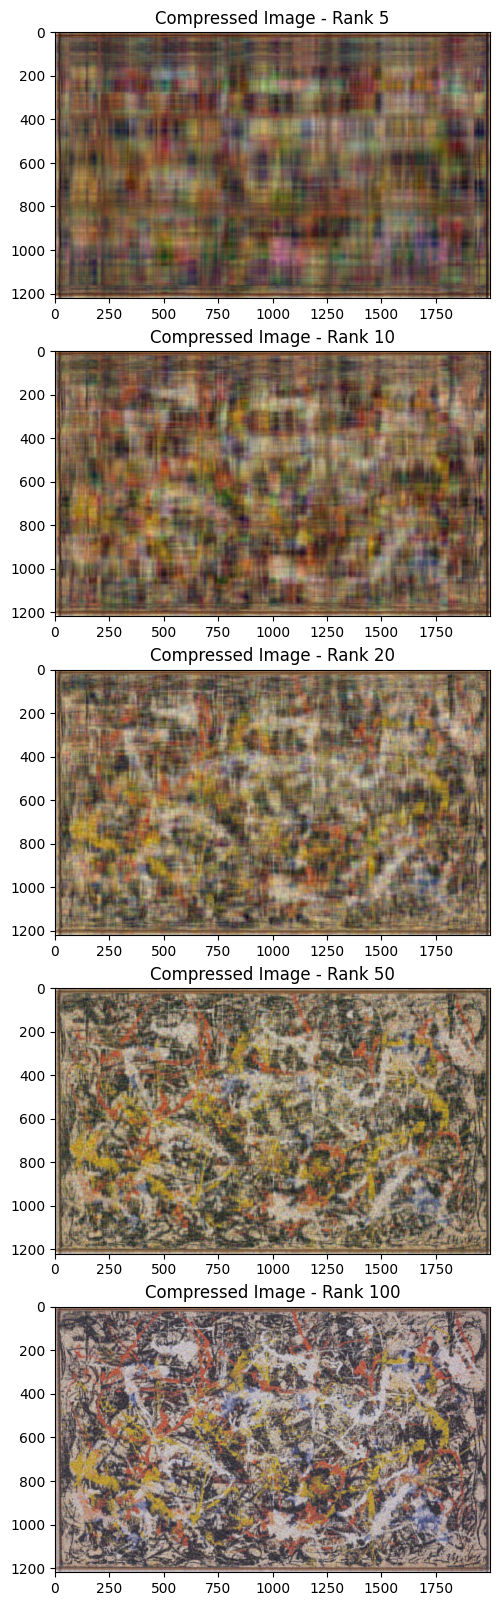

In [ ]:
def compress_and_save_image(original_image, rank, output_folder="/content/drive/My Drive/Data Science UB/Numerical Linear Algebra/compressed images"):
    compressed_channels = []
    frobenius_norm_percentage_list = []

    for channel in range(min(original_image.shape[2], 3)):
        U, S, V = scipy.linalg.svd(original_image[:,:,channel])
        S_k = S[:rank]
        compressed_channel = U[:,:rank].dot(np.diag(S_k).dot(V[:rank,:]))
        frobenius_norm_percentage = np.sum(S_k**2) / np.sum(S**2)
        frobenius_norm_percentage_list.append(frobenius_norm_percentage)
        #This normalization is necessary otherwise it produces errors
        compressed_channel = (compressed_channel - compressed_channel.min()) / (compressed_channel.max() - compressed_channel.min())
        compressed_channels.append(compressed_channel)
    #We recreate the original image
    compressed_image = np.stack(compressed_channels, axis=-1)
    output_filename = os.path.join(output_folder, f"compressed3_{rank}_rank_")
    output_filename += f"{int(np.mean(frobenius_norm_percentage_list) * 100)}%.jpeg"

    #We save it
    plt.imsave(output_filename, compressed_image)

    return output_filename, np.mean(frobenius_norm_percentage_list)

fig = plt.figure(figsize=(20, 20))
for i, rank in enumerate(test_ranks):
    compressed_filename, frobenius_norm_percentage = compress_and_save_image(Image, rank, output_folder)
    path = os.path.join(output_folder, f"compressed3_{rank}_rank_{int(frobenius_norm_percentage * 100)}%.jpeg")
    Image_approx = plt.imread(path)

    plt.subplot(5, 1, i+1)
    plt.imshow(Image_approx)
    plt.title(f"Compressed Image - Rank {rank}")

plt.show()

